In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import json

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# ValueError: could not convert string to float: '8789-0'
def read_data_partial(given_fname, output_fname, lim=399999):
    content = []
    count = 1

    with open(given_fname, 'r') as fr:
        for line in fr:
            if count <= lim:
                #print(type(line), line)
                content.append(line)
                count += 1
    with open(output_fname, 'w') as fw:
        for line in content:
            # print(type(line), line)
            fw.write(line)
    
    data = pd.read_csv(output_fname, index_col=False)

    return data

snr < 5, Y-J > 0.6 not working <br> try snr < 5, z < 7.5

check: see if the test Y - J is greater than 0.6

## drop u, g, r, i, z bands

In [3]:
# snr < 5 -> 1/mag_err < 5, so mag_err > 0.2
qso_train_partial = read_data_partial('quasar_train_catalog.csv', 'qso_train_partial.csv')
qso_train_drop = qso_train_partial[['z', 'r_LSST_magerr', 'i_LSST_magerr', 'z_LSST_magerr', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
qso_train_drop = qso_train_drop.replace(99.99, np.nan).dropna()

#qso_train_drop = qso_train_drop[qso_train_drop['z'] < 7.5]
#qso_train_drop = qso_train_drop[qso_train_drop['z'] > 6.5]

qso_train_drop = qso_train_drop[qso_train_drop['z'] < 7.5]
qso_train_drop = qso_train_drop[qso_train_drop['z'] > 7.0]

qso_train_drop = qso_train_drop[(qso_train_drop['r_LSST_magerr']>0.2)&(qso_train_drop['i_LSST_magerr']>0.2)&(qso_train_drop['z_LSST_magerr']>0.2)]
qso_train_drop = qso_train_drop.drop(columns=['z', 'r_LSST_magerr', 'i_LSST_magerr', 'z_LSST_magerr'])
print('qso_train_catalog.csv partial data description: ')
qso_train_drop.describe()

qso_train_catalog.csv partial data description: 


,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,2291.000000,2291.000000,2291.000000,2291.000000
mean,23.960387,23.541198,23.608148,23.578978
std,2.165686,2.162257,2.195159,2.222121
min,19.409813,18.831905,18.769795,18.799870
25%,22.131682,21.752759,21.781314,21.749511
50%,23.435056,23.036009,23.131235,23.086474
75%,25.783881,25.363147,25.466455,25.406757
max,31.117735,32.021081,31.023018,31.005492


In [4]:
# brown dwarf contaminants
mlt_train_partial = read_data_partial('mlt_train_catalog.csv', 'mlt_train_partial.csv', 699999)
mlt_train_drop = mlt_train_partial[['r_LSST_magerr', 'i_LSST_magerr', 'z_LSST_magerr', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
mlt_train_drop = mlt_train_drop.replace(99.99, np.nan).dropna()
mlt_train_drop = mlt_train_drop[(mlt_train_drop['r_LSST_magerr']>0.2)&(mlt_train_drop['i_LSST_magerr']>0.2)&(mlt_train_drop['z_LSST_magerr']>0.2)]
mlt_train_drop = mlt_train_drop.drop(columns=['r_LSST_magerr', 'i_LSST_magerr', 'z_LSST_magerr'])
print('mlt_train_catalog.csv partial data description: ')
mlt_train_drop.describe()

mlt_train_catalog.csv partial data description: 


,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,68144.000000,68144.000000,68144.000000,68144.000000
mean,25.602722,24.941791,24.505776,24.568669
std,0.847145,0.803847,0.768768,0.807818
min,23.718729,23.140103,22.661369,22.577807
25%,24.982332,24.346781,23.950677,23.997374
50%,25.436658,24.788223,24.364472,24.426453
75%,26.074744,25.401027,24.939337,25.006381
max,34.114794,31.846677,32.811247,32.324519


In [5]:
galaxies_patch8789_partial = read_data_partial('galaxies_train_catalog_patch8789.csv', 'galaxies_patch8789_partial.csv', 99999)
galaxies_patch8789_drop = galaxies_patch8789_partial[['r_LSST_magerr', 'i_LSST_magerr', 'z_LSST_magerr', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
galaxies_patch8789_drop = galaxies_patch8789_drop.replace(99.99, np.nan).dropna()
galaxies_patch8789_drop = galaxies_patch8789_drop[(galaxies_patch8789_drop['r_LSST_magerr']>0.2)&(galaxies_patch8789_drop['i_LSST_magerr']>0.2)&(galaxies_patch8789_drop['z_LSST_magerr']>0.2)]
galaxies_patch8789_drop = galaxies_patch8789_drop.drop(columns=['r_LSST_magerr', 'i_LSST_magerr', 'z_LSST_magerr'])
print('galaxies_train_catalog_patch8789.csv partial data description: ')
galaxies_patch8789_drop.describe()

galaxies_train_catalog_patch8789.csv partial data description: 


,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,32094.000000,32094.000000,32094.000000,32094.000000
mean,27.313408,27.203653,27.131699,27.131667
std,0.783648,0.797858,0.821157,0.980817
min,25.254059,24.748167,24.475726,24.258516
25%,26.816322,26.710083,26.631378,26.532727
50%,27.232895,27.151260,27.093592,27.021649
75%,27.689617,27.613425,27.569015,27.581969
max,39.647494,35.639915,36.653085,36.270559


In [6]:
galaxies_patch8786_partial = read_data_partial('galaxies_train_catalog_patch8786.csv', 'galaxies_patch8786_partial.csv', 99999)
galaxies_patch8786_drop = galaxies_patch8786_partial[['r_LSST_magerr', 'i_LSST_magerr','z_LSST_magerr', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
galaxies_patch8786_drop = galaxies_patch8786_drop.replace(99.99, np.nan).dropna()
galaxies_patch8786_drop = galaxies_patch8786_drop[(galaxies_patch8786_drop['r_LSST_magerr']>0.2)&(galaxies_patch8786_drop['i_LSST_magerr']>0.2)&(galaxies_patch8786_drop['z_LSST_magerr']>0.2)]
galaxies_patch8786_drop = galaxies_patch8786_drop.drop(columns=['r_LSST_magerr', 'i_LSST_magerr', 'z_LSST_magerr'])
print('galaxies_train_catalog_patch8786.csv partial data description: ')
galaxies_patch8786_drop.describe()

galaxies_train_catalog_patch8786.csv partial data description: 


,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,29266.000000,29266.000000,29266.000000,29266.000000
mean,27.296213,27.185833,27.120217,27.108315
std,0.778891,0.794467,0.831882,0.972003
min,25.143527,24.906144,24.693521,24.585557
25%,26.797670,26.690426,26.609511,26.513586
50%,27.217215,27.133513,27.083019,27.002155
75%,27.676521,27.604392,27.564082,27.567528
max,37.436853,35.147775,35.113343,36.965909


### drop missing values

In [7]:
print(qso_train_drop.head(), len(qso_train_drop))
print(np.where(np.isnan(qso_train_drop)))
print(len(mlt_train_drop))
print(np.where(np.isnan(mlt_train_drop)))
print(len(galaxies_patch8789_drop))
print(np.where(np.isnan(galaxies_patch8789_drop)))
print(len(galaxies_patch8786_drop))
print(np.where(np.isnan(galaxies_patch8786_drop)))

       Y_WFI_mag  J_WFI_mag  H_WFI_mag  F_WFI_mag
33485  19.409813  18.831905  18.769795  18.799870
57487  20.091360  19.424318  19.320320  19.235941
61355  20.077260  19.575394  19.563593  19.533493
61475  20.191991  19.579771  19.555423  19.596937
61481  20.150763  19.489970  19.360541  19.264268 2291
(array([], dtype=int64), array([], dtype=int64))
68144
(array([], dtype=int64), array([], dtype=int64))
32094
(array([], dtype=int64), array([], dtype=int64))
29266
(array([], dtype=int64), array([], dtype=int64))


In [8]:
qso_train_drop['label'] = np.ones(len(qso_train_drop))
mlt_train_drop['label'] = np.zeros(len(mlt_train_drop))
galaxies_patch8789_drop['label'] = np.zeros(len(galaxies_patch8789_drop))
galaxies_patch8786_drop['label'] = np.zeros(len(galaxies_patch8786_drop))

### check the cleaned datasets and concatenate into new ones

In [9]:
print('qso:\n', qso_train_drop.head())
print('bd:\n', mlt_train_drop.head())
print('galaxies patch8789:\n', galaxies_patch8789_drop.head())
print('galaxies path8786:\n', galaxies_patch8786_drop.head())

qso:
        Y_WFI_mag  J_WFI_mag  H_WFI_mag  F_WFI_mag  label
33485  19.409813  18.831905  18.769795  18.799870    1.0
57487  20.091360  19.424318  19.320320  19.235941    1.0
61355  20.077260  19.575394  19.563593  19.533493    1.0
61475  20.191991  19.579771  19.555423  19.596937    1.0
61481  20.150763  19.489970  19.360541  19.264268    1.0
bd:
         Y_WFI_mag  J_WFI_mag  H_WFI_mag  F_WFI_mag  label
398748  24.765011  24.552765  24.583480  24.494495    0.0
398754  25.012661  24.903466  24.772002  24.571289    0.0
450302  24.498288  24.137599  23.923734  23.811852    0.0
450419  24.346720  24.081134  24.174389  24.054186    0.0
450443  24.672059  24.145717  23.854213  24.066039    0.0
galaxies patch8789:
      Y_WFI_mag  J_WFI_mag  H_WFI_mag  F_WFI_mag  label
18   26.164061  25.958663  25.639332  25.724063    0.0
21   26.708459  27.106227  27.964695  26.722699    0.0
75   26.453127  26.294853  25.942654  26.079247    0.0
130  26.037628  25.668664  25.696706  25.603397    0.0
132

In [10]:
# data concatenation to get training data
contaminants_drop = pd.concat([mlt_train_drop, galaxies_patch8789_drop, galaxies_patch8786_drop], ignore_index=True)
data_train_drop = pd.concat([qso_train_drop, contaminants_drop], ignore_index=True) # make sure that the data line up
X_drop = data_train_drop[['Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
Y_drop = data_train_drop['label']

In [11]:
print(len(X_drop))

131795


In [12]:
X_drop.describe()

,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,131795.000000,131795.000000,131795.000000,131795.000000
mean,26.366802,25.966546,25.710178,25.739539
std,1.244729,1.434758,1.570852,1.595373
min,19.409813,18.831905,18.769795,18.799870
25%,25.358414,24.711739,24.296788,24.360108
50%,26.452616,26.018072,25.666547,25.685979
75%,27.251979,27.110823,27.040846,26.969155
max,39.647494,35.639915,36.653085,36.965909


In [13]:
col_names = ['Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']
for i in range(len(col_names)):
    for j in range(len(col_names)):
        if i < j:
            col = col_names[i] + '-' + col_names[j]
            X_drop[col] = X_drop[col_names[i]] - X_drop[col_names[j]]

X_drop_copy = X_drop.drop(columns=['Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'])

In [14]:
X_drop_copy.head()

,Y_WFI_mag-J_WFI_mag,Y_WFI_mag-H_WFI_mag,Y_WFI_mag-F_WFI_mag,J_WFI_mag-H_WFI_mag,J_WFI_mag-F_WFI_mag,H_WFI_mag-F_WFI_mag
0,0.577908,0.640018,0.609943,0.062110,0.032035,-0.030075
1,0.667041,0.771040,0.855419,0.103998,0.188377,0.084379
2,0.501866,0.513667,0.543767,0.011801,0.041901,0.030100
3,0.612219,0.636568,0.595053,0.024348,-0.017166,-0.041514
4,0.660793,0.790222,0.886495,0.129430,0.225702,0.096273


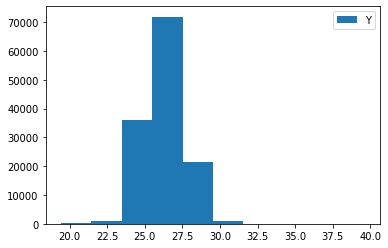

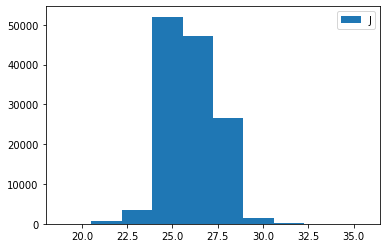

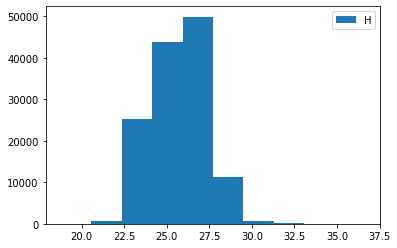

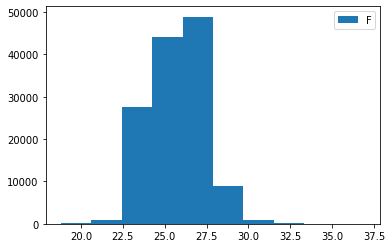

In [14]:
plt.hist(X_drop['Y_WFI_mag'], label='Y')
plt.legend()
plt.show()
plt.hist(X_drop['J_WFI_mag'], label='J')
plt.legend()
plt.show()
plt.hist(X_drop['H_WFI_mag'], label='H')
plt.legend()
plt.show()
plt.hist(X_drop['F_WFI_mag'], label='F')
plt.legend()
plt.show()

In [25]:
import seaborn as sns

In [26]:
def color_plot(X, x_lab, y_lab):
    sns.scatterplot(data=X[X['label']==1], x=x_lab, y=y_lab, color='orange', alpha=0.3, label='qso')
    sns.kdeplot(data=X[X['label']==0], x=x_lab, y=y_lab, cmap="Blues", shade=True, cbar=True, bw_adjust=.5)
    plt.show()
    '''ax = plt.gca()
    for child in ax.get_children():
        if isinstance(child, PolyCollection):
            print('+1')
            kde = child.get_paths()[0]

            x = kde.vertices[:, 0]
            y = kde.vertices[:, 1]
    return np.column_stack([x, y])'''

In [27]:
X_drop_copy['label'] = Y_drop

In [48]:
import seaborn as sns
import csv

In [28]:
def sketch(x1_lab, y_lab, X):
    fig, ax = plt.subplots()
    sns.scatterplot(data=X[X['label']==1], x=x_lab, y=y_lab, color='orange', alpha=0.3, label='qso')
    a1 = sns.kdeplot(data=X[X['label']==0], x=x_lab, y=y_lab, cmap="Blues", shade=True, cbar=True, bw_adjust=.5)
    p1 = a1.collections[0].get_paths()[0]
    v1 = p1.vertices
    x, y = v1[:,0], v1[:,1] 
    arr1 = {}
    arr1['x'] = x.tolist()
    arr1['y'] = y.tolist()
    plt.show()
    return arr1

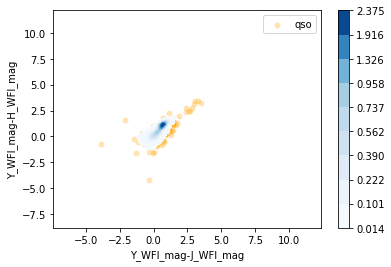

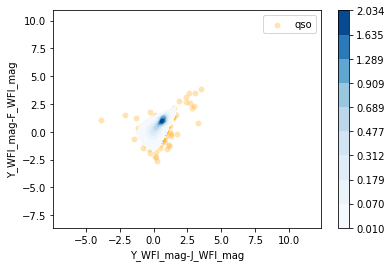

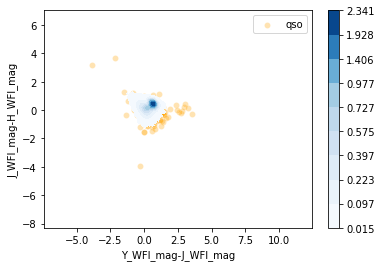

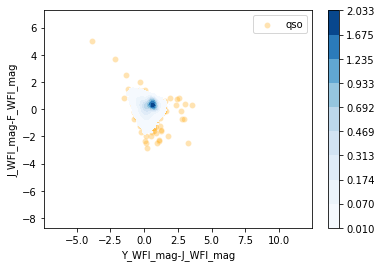

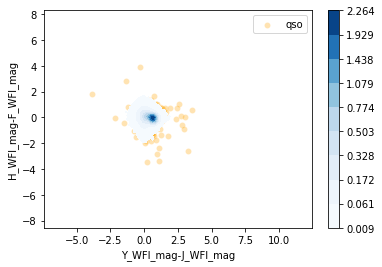

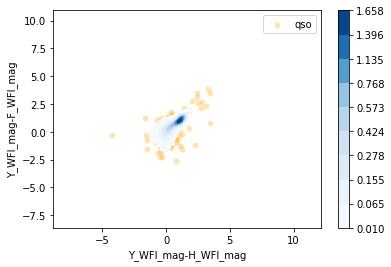

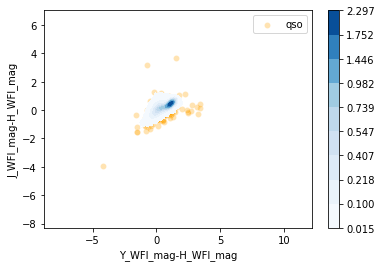

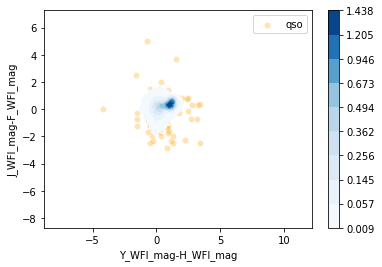

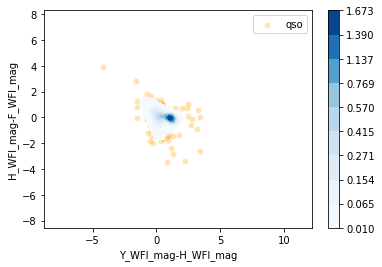

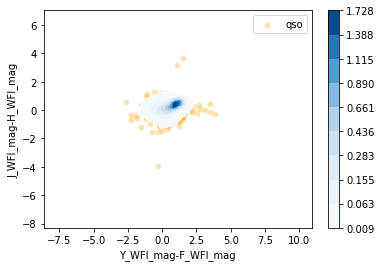

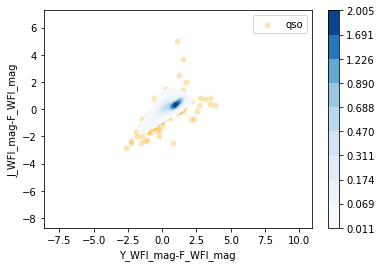

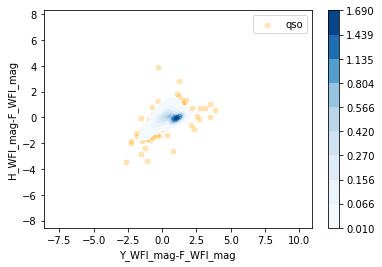

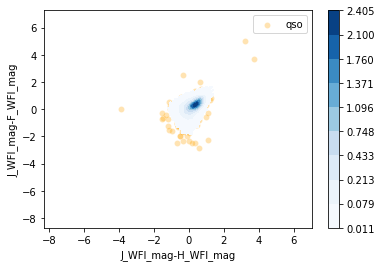

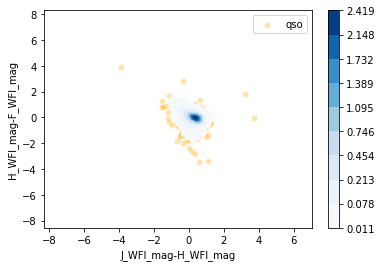

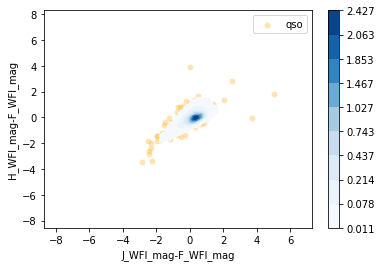

In [29]:
column = X_drop_copy.columns

coords = []
for i in range(0, 6): 
    x_lab = column[i] 
    for j in range(i+1, 6):
        y_lab = column[j]
        coord = sketch(x_lab, y_lab, X_drop_copy)
        coords.append(coord)

In [55]:
coords

[{'x': [0.0,
   0.13260155,
   0.25978993539242673,
   0.3535533905932738,
   0.44731684579412084,
   0.5,
   0.5,
   0.5,
   0.44731684579412084,
   0.3535533905932738,
   0.25978993539242673,
   0.13260155,
   0.0,
   -0.13260155,
   -0.25978993539242673,
   -0.3535533905932738,
   -0.44731684579412084,
   -0.5,
   -0.5,
   -0.5,
   -0.44731684579412084,
   -0.3535533905932738,
   -0.25978993539242673,
   -0.13260155,
   0.0,
   0.0],
  'y': [-0.5,
   -0.5,
   -0.44731684579412084,
   -0.3535533905932738,
   -0.25978993539242673,
   -0.13260155,
   0.0,
   0.13260155,
   0.25978993539242673,
   0.3535533905932738,
   0.44731684579412084,
   0.5,
   0.5,
   0.5,
   0.44731684579412084,
   0.3535533905932738,
   0.25978993539242673,
   0.13260155,
   0.0,
   -0.13260155,
   -0.25978993539242673,
   -0.3535533905932738,
   -0.44731684579412084,
   -0.5,
   -0.5,
   -0.5]},
 {'x': [0.0,
   0.13260155,
   0.25978993539242673,
   0.3535533905932738,
   0.44731684579412084,
   0.5,
   0.5,


In [30]:
np.savetxt("coordinates.txt", coords, delimiter ="\n ", fmt ='% s')

In [43]:
X_drop_copy = X_drop_copy.drop(columns=['label'])

In [18]:
print(X_drop_copy.head())

   Y_WFI_mag-J_WFI_mag  Y_WFI_mag-H_WFI_mag  Y_WFI_mag-F_WFI_mag  \
0             0.577908             0.640018             0.609943   
1             0.667041             0.771040             0.855419   
2             0.501866             0.513667             0.543767   
3             0.612219             0.636568             0.595053   
4             0.660793             0.790222             0.886495   

   J_WFI_mag-H_WFI_mag  J_WFI_mag-F_WFI_mag  H_WFI_mag-F_WFI_mag  
0             0.062110             0.032035            -0.030075  
1             0.103998             0.188377             0.084379  
2             0.011801             0.041901             0.030100  
3             0.024348            -0.017166            -0.041514  
4             0.129430             0.225702             0.096273  


# KNN won't work so skip these few steps

### Not working × 1

In [17]:
from numba import jit, cuda

In [18]:
@jit(forceobj=True, parallel=True) 
def knn_training(x1, x2, y1, y2, y, n, leaves):
    # format x1: X['r']
    # type: n -> list of integers
    features = [x1-x2, y1-y2]
    X = np.array(features).transpose()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    grid_params = {'n_neighbors' : n,
                   'leaf_size': leaves,
                   'weights' :  ['uniform','distance'],
                   'metric' : ['minkowski','euclidean','manhattan'],
                  'p': [1, 2, 3, 4, 5, 6],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

    gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
    g_res = gs.fit(X_train, y_train)

    print('best score: ', g_res.best_score_)
    print('best params: ', g_res.best_params_)

In [19]:
def get_color_filter(clf, n_neighbors, weights, x1, x2, y1, y2, y):
    # Create color maps
    cmap_light = ListedColormap(['#75aff9', '#f7a844']) # blue, orange
    cmap_bold = ListedColormap(['#8dbcf9', '#f5a844']) 
    
    features = [x1-x2, y1-y2]
    X = np.array(features).transpose()

    # we create an instance of Neighbours Classifier and fit the data.
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = min(x1 - x2) - 1, max(x1 - x2) + 1
    y_min, y_max = min(y1 - y2) - 1, max(y1 - y2) + 1
    h = (x_max-x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.15)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, alpha=0.2)
    plt.axis([x_min, x_max, y_min, y_max])
    plt.title("k = %i, weights = '%s'"
              % (n_neighbors, weights))

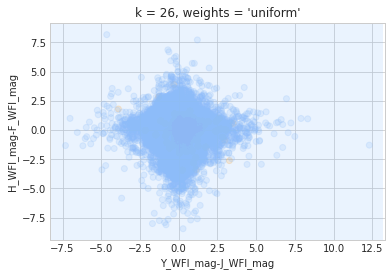

In [39]:
# Y - J
# H - F
# best score:  0.982797866805411
# best params:  {'algorithm': 'auto', 'leaf_size': 3, 'metric': 'minkowski', 'n_neighbors': 26, 'p': 1, 'weights': 'uniform'}
# knn_training(X_drop['Y_WFI_mag'], X_drop['J_WFI_mag'], X_drop['H_WFI_mag'], X_drop['F_WFI_mag'], Y_drop, [26, 30, 36, 41, 50, 66], [3])

filter1 = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=26, leaf_size=3, weights='uniform', p=1)
get_color_filter(filter1, 26, 'uniform', X_drop['Y_WFI_mag'], X_drop['J_WFI_mag'], X_drop['H_WFI_mag'], X_drop['F_WFI_mag'], Y_drop)
plt.xlabel('Y_WFI_mag-J_WFI_mag')
plt.ylabel('H_WFI_mag-F_WFI_mag')
plt.show() 

### Not working × 2

In [22]:
from matplotlib.lines import Line2D
from matplotlib.ticker import MaxNLocator
from sklearn import neighbors

https://stackoverflow.com/questions/41138706/recreating-decision-boundary-plot-in-python-with-scikit-learn-and-matplotlib

In [ ]:
def knn_boundary(x0, x1, y, n, leaf, w, degree, color1, color2, TRUE_DOT_SIZE = 50):
    # x0:x; x1:y
    # y: label
    # set main parameters for KNN plot
    H = 0.1 # mesh stepsize
    PROB_DOT_SCALE = 40 # modifier to scale the probability dots
    PROB_DOT_SCALE_POWER = 3 # exponential used to increase/decrease size of prob dots
    # TRUE_DOT_SIZE = 50 # size of the true labels
    PAD = 0.5 # how much to "pad" around the true labels

    clf = neighbors.KNeighborsClassifier(n_neighbors=n, leaf_size=leaf, weights=w, p=degree)
    x = np.array([x0, x1]).transpose()
    clf.fit(x, y)

    # find the min/max points for both x0 and x1 features
    # these min/max values will be used to set the bounds
    # for the plot
    x0_min, x0_max = np.round(x0.min())-PAD, np.round(x0.max()+PAD)
    x1_min, x1_max = np.round(x1.min())-PAD, np.round(x1.max()+PAD)

    # create 1D arrays representing the range of probability data points
    # on both the x0 and x1 axes.
    x0_axis_range = np.arange(x0_min,x0_max, H)
    x1_axis_range = np.arange(x1_min,x1_max, H)

    # create meshgrid between the two axis ranges
    xx0, xx1 = np.meshgrid(x0_axis_range, x1_axis_range)

    # put the xx in the same dimensional format as the original x
    # because it's easier to work with that way (at least for me)
    # * shape will be: [no_dots, no_dimensions]
    #   where no_dimensions = 2 (x0 and x1 axis)
    xx = np.reshape(np.stack((xx0.ravel(),xx1.ravel()),axis=1),(-1,2))

    yy_hat = clf.predict(xx) # prediction of all the little dots
    yy_prob = clf.predict_proba(xx) # probability of each dot being 
                                    # the predicted color
    yy_size = np.max(yy_prob, axis=1)

    # make figure
    plt.style.use('seaborn-whitegrid') # set style because it looks nice
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), dpi=150)

    # establish colors and colormap
    #  * color blind colors, from 
    #  https://towardsdatascience.com/two-simple-steps-to-create-colorblind-friendly-data-visualizations-2ed781a167ec
    redish = '#d73027' # used for contour to get a clear boundary
    orangeish = '#fc8d59'
    blueish = '#4575b4'
    colormap = np.array([orangeish, blueish])

    # plot all the little dots, position defined by the xx values, color
    # defined by the knn predictions (yy_hat), and size defined by the 
    # probability of that color (yy_prob)
    # * because the yy_hat values are either 0, 1, 2, we can use 
    #   these as values to index into the colormap array
    # * size of dots (the probability) increases exponentially (^3), so that there is
    #   a nice difference between different probabilities. I'm sure there is a more
    #   elegant way to do this though...
    # * linewidths=0 so that there are no "edges" around the dots
    '''
    print('xx[:,0] (x data):', xx[:,0])
    print('xx[:,1] (y data):', xx[:,1])
    print('yy_hat:', yy_hat)
    print('colormap[yy_hat]:', colormap[yy_hat])'''
    ax.scatter(xx[:,0], xx[:,1], c=colormap[yy_hat.astype(int)], alpha=0.4, 
               s=PROB_DOT_SCALE*yy_size**PROB_DOT_SCALE_POWER, linewidths=0,)

    # plot the contours
    # * we have to reshape the yy_hat to get it into a 
    #   2D dimensional format, representing both the x0
    #   and x1 axis
    # * the number of levels and color scheme was manually tuned
    #   to make sense for this data. Would probably change, for 
    #   instance, if there were 4, or 5 (etc.) classes
    ax.contour(x0_axis_range, x1_axis_range, 
               np.reshape(yy_hat,(xx0.shape[0],-1)), 
               levels=3, linewidths=1, 
               colors=[orangeish, blueish,redish,])

    # plot the original x values.
    # * zorder is 3 so that the dots appear above all the other dots 
    ax.scatter(x[:,0], x[:,1], c=colormap[y.astype(int)], s=TRUE_DOT_SIZE, zorder=3, 
               linewidths=0.7, edgecolor='k')

    # create legends
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()

    # set x-y labels
    ax.set_ylabel(r"$x_1$")
    ax.set_xlabel(r"$x_0$")

    # create class legend
    # Line2D properties: https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html
    # about size of scatter plot points: https://stackoverflow.com/a/47403507/9214620
    legend_class = []
    for elt_class, color in zip(['qso', 'contam'], [orangeish, blueish]):
        legend_class.append(Line2D([0], [0], marker='o', label=elt_class,ls='None',
                                   markerfacecolor=color, markersize=np.sqrt(TRUE_DOT_SIZE), 
                                   markeredgecolor='k', markeredgewidth=0.7))

    # iterate over each of the probabilities to create prob legend
    prob_values = [0.4, 0.6, 0.8, 1.0]
    legend_prob = []
    for prob in prob_values:
        legend_prob.append(Line2D([0], [0], marker='o', label=prob, ls='None', alpha=0.8,
                                  markerfacecolor='grey', 
                                  markersize=np.sqrt(PROB_DOT_SCALE*prob**PROB_DOT_SCALE_POWER), 
                                  markeredgecolor='k', markeredgewidth=0))



    legend1 = ax.legend(handles=legend_class, loc='center', 
                        bbox_to_anchor=(1.05, 0.35),
                        frameon=False, title='class')

    legend2 = ax.legend(handles=legend_prob, loc='center', 
                        bbox_to_anchor=(1.05, 0.65),
                        frameon=False, title='prob', )

    ax.add_artist(legend1) # add legend back after it disappears

    ax.set_yticks(np.arange(x1_min,x1_max, 1)) # I don't like the decimals
    ax.grid(False) # remove gridlines (inherited from 'seaborn-whitegrid' style)

    # only use integers for axis tick labels
    # from: https://stackoverflow.com/a/34880501/9214620
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    # set the aspect ratio to 1, for looks
    ax.set_aspect(1)

    # remove first ticks from axis labels, for looks
    # from: https://stackoverflow.com/a/19503828/9214620
    ax.set_xticks(ax.get_xticks()[1:-1])
    ax.set_yticks(np.arange(x1_min,x1_max, 1)[1:])
    
    plt.xlabel(color1)
    plt.ylabel(color2)
    plt.show()

<ipython-input-30-ed32355336fc>:41: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid') # set style because it looks nice


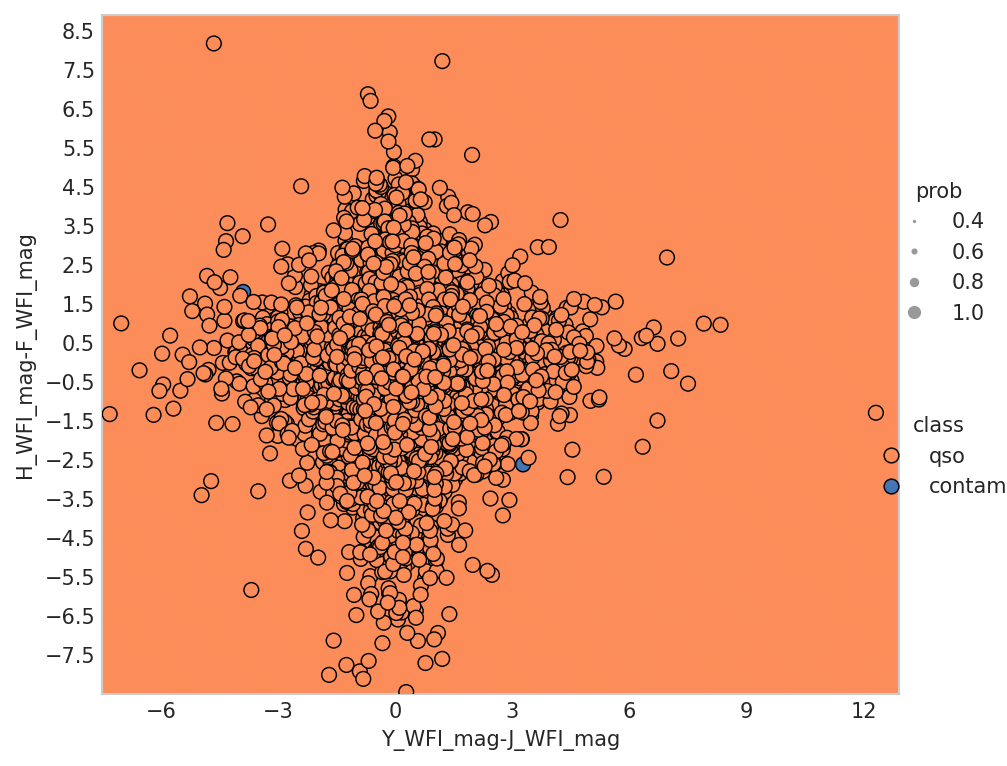

In [32]:
# Y - J
# H - F
knn_boundary(X_drop_copy['Y_WFI_mag-J_WFI_mag'], X_drop_copy['H_WFI_mag-F_WFI_mag'], Y_drop, 41, 3, 3, 'Y_WFI_mag-J_WFI_mag', 'H_WFI_mag-F_WFI_mag', TRUE_DOT_SIZE = 50)

# continue from here

In [31]:
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [47]:
def plot_with_labels(idx, X, x_lab, y_lab):
    # idx: which color set of contour coordinates
    # X, x_lab, y_lab: data for the scatter plot
    x = x_coords[idx]
    y = y_coords[idx]
    vertices = np.column_stack((x, y))
    path = Path(vertices)
    x_min, x_max = min(x), max(x)
    y_min, y_max = min(y), max(y)

    grid_size = X.shape[0]
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_size), np.linspace(y_min, y_max, grid_size))
    # xx.ravel: [xx] -> [xx1, xx2, xx3,...]
    # np.column_stack: ([xx], [yy]) -> ([xx1, yy1], [xx2, yy2],...)
    grid_points = np.column_stack((xx.ravel(), yy.ravel()))

    labels = path.contains_points(grid_points) # check which points fall within the contour; if yes, return True
    labels = labels.reshape(xx.shape)
    pred_qso_idx = np.where(labels)[0]

    plt.contourf(xx, yy, labels, cmap=plt.cm.Paired)
    plt.colorbar()
    scatter = plt.scatter(X[x_lab], X[y_lab], c=labels.flatten(), cmap=plt.cm.Paired)
    plt.colorbar(scatter)
    plt.scatter(x, y, c='black')
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.title('Contour Classification')
    plt.show()
    X['label'] = np.zeros(grid_size)
    X.loc[pred_qso_idx, 'label'] = 1

In [38]:
x_coords = []
y_coords = []
with open('coordinates.txt', 'r') as file:
    for line in file:
        coords = eval(line)
        x_coords.append(coords['x'])
        y_coords.append(coords['y'])

In [41]:
column = X_drop_copy.columns
colors = {}
count = 0
for i in range(0, 6): 
    x_lab = column[i] 
    for j in range(i+1, 6):
        y_lab = column[j]
        colors[count] = [x_lab, y_lab]
        count += 1

In [42]:
colors

{0: ['Y_WFI_mag-J_WFI_mag', 'Y_WFI_mag-H_WFI_mag'],
 1: ['Y_WFI_mag-J_WFI_mag', 'Y_WFI_mag-F_WFI_mag'],
 2: ['Y_WFI_mag-J_WFI_mag', 'J_WFI_mag-H_WFI_mag'],
 3: ['Y_WFI_mag-J_WFI_mag', 'J_WFI_mag-F_WFI_mag'],
 4: ['Y_WFI_mag-J_WFI_mag', 'H_WFI_mag-F_WFI_mag'],
 5: ['Y_WFI_mag-H_WFI_mag', 'Y_WFI_mag-F_WFI_mag'],
 6: ['Y_WFI_mag-H_WFI_mag', 'J_WFI_mag-H_WFI_mag'],
 7: ['Y_WFI_mag-H_WFI_mag', 'J_WFI_mag-F_WFI_mag'],
 8: ['Y_WFI_mag-H_WFI_mag', 'H_WFI_mag-F_WFI_mag'],
 9: ['Y_WFI_mag-F_WFI_mag', 'J_WFI_mag-H_WFI_mag'],
 10: ['Y_WFI_mag-F_WFI_mag', 'J_WFI_mag-F_WFI_mag'],
 11: ['Y_WFI_mag-F_WFI_mag', 'H_WFI_mag-F_WFI_mag'],
 12: ['J_WFI_mag-H_WFI_mag', 'J_WFI_mag-F_WFI_mag'],
 13: ['J_WFI_mag-H_WFI_mag', 'H_WFI_mag-F_WFI_mag'],
 14: ['J_WFI_mag-F_WFI_mag', 'H_WFI_mag-F_WFI_mag']}

## Test

In [50]:
# retrieve redshift for later usage
qso_test = pd.read_csv('quasar_test_catalog.csv', index_col=False)
qso_test = qso_test[['z', 'r_LSST_magerr', 'i_LSST_magerr', 'z_LSST_magerr', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
qso_test = qso_test.replace(99.99, np.nan).dropna()
qso_test = qso_test[(qso_test['r_LSST_magerr']>0.2)&(qso_test['i_LSST_magerr']>0.2)&(qso_test['z_LSST_magerr']>0.2)]
qso_test = qso_test.drop(columns=['r_LSST_magerr', 'i_LSST_magerr', 'z_LSST_magerr'])
# qso_test = qso_test[(qso_test['z']>7.0)&(qso_test['z']<7.5)]
qso_test.describe()

,z,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,2741.000000,2741.000000,2741.000000,2741.000000,2741.000000,2741.000000,2741.000000
mean,6.408643,29.271861,27.780416,26.744274,26.699009,26.742366,26.526038
std,0.348702,1.166524,1.207716,1.647375,1.708899,1.690108,1.633361
min,6.000191,26.931893,25.946137,21.133869,20.875274,20.842282,20.719241
25%,6.134873,28.465031,26.931558,25.896414,25.833993,25.883485,25.698476
50%,6.321619,29.037492,27.568886,26.810375,26.789130,26.813554,26.601418
75%,6.600293,29.770013,28.345701,27.756961,27.695566,27.740839,27.462852
max,8.482816,35.495708,36.798806,35.672331,33.879891,34.514265,34.228085


In [51]:
galaxies_patch8788 = read_data_partial('galaxies_train_catalog_patch8788.csv', 'galaxies_patch8788_245.csv', 30000)
galaxies_patch8788 = galaxies_patch8788.replace(99.99, np.nan).dropna()
galaxies_patch8788 = galaxies_patch8788[['z', 'r_LSST_magerr', 'i_LSST_magerr', 'z_LSST_magerr', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
galaxies_patch8788_26 = galaxies_patch8788[(galaxies_patch8788['r_LSST_magerr']>0.2)&(galaxies_patch8788['i_LSST_magerr']>0.2)&(galaxies_patch8788['z_LSST_magerr']>0.2)]
galaxies_patch8788_26 = galaxies_patch8788.drop(columns=['r_LSST_magerr', 'i_LSST_magerr', 'z_LSST_magerr'])
print('galaxies_train_catalog_patch8788.csv data description: ')
galaxies_patch8788.describe()

galaxies_train_catalog_patch8788.csv data description: 


,z,r_LSST_magerr,i_LSST_magerr,z_LSST_magerr,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000
mean,1.032609,0.071881,0.074232,0.087213,25.064565,24.472561,24.263562,24.133942,24.032490,23.970953
std,0.014266,0.336052,0.207255,0.203601,1.258280,1.250795,1.294158,1.348217,1.403003,1.451221
min,1.005989,0.010337,0.010588,0.010742,20.738443,20.199310,19.730171,19.315425,18.971169,18.750817
25%,1.020363,0.025039,0.027430,0.031322,24.321473,23.749411,23.524088,23.357096,23.211484,23.120767
50%,1.033982,0.045740,0.049470,0.057587,25.208614,24.607205,24.439207,24.332423,24.249539,24.205313
75%,1.045150,0.079893,0.086826,0.103725,25.930392,25.342387,25.182842,25.094375,25.045359,25.005333
max,1.055212,43.286299,23.300493,19.899013,32.004925,31.083271,28.285061,28.161714,30.885336,32.729688


In [52]:
mlt_test = read_data_partial('mlt_test_catalog_z.csv', 'mlt_test_catalog_z26.csv', 120000)
mlt_test = mlt_test[['spt', 'r_LSST_magerr', 'i_LSST_magerr', 'z_LSST_magerr', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
mlt_test = mlt_test.replace(99.99, np.nan).dropna()
mlt_test = mlt_test[(mlt_test['r_LSST_magerr']>0.2)&(mlt_test['i_LSST_magerr']>0.2)&(mlt_test['z_LSST_magerr']>0.2)]
mlt_test = mlt_test.drop(columns=['r_LSST_magerr', 'i_LSST_magerr', 'z_LSST_magerr'])
mlt_test['z'] = np.zeros(mlt_test.shape[0])
print('mlt_test_catalog partial data description: ')
mlt_test.describe()

mlt_test_catalog partial data description: 


,spt,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,z
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.0
mean,14.108871,27.456355,25.957646,24.429926,23.850084,23.538882,23.562467,0.0
std,3.482786,0.484635,0.037634,0.312960,0.309554,0.355549,0.380994,0.0
min,8.000000,26.771615,25.821283,23.112074,22.822550,22.612270,22.553414,0.0
25%,12.000000,27.094107,25.938446,24.215270,23.637779,23.304962,23.315367,0.0
50%,14.000000,27.334436,25.967429,24.409880,23.809886,23.509209,23.518662,0.0
75%,16.000000,27.656400,25.987376,24.601961,24.065554,23.738404,23.797265,0.0
max,29.000000,29.410769,25.999972,25.525366,24.786487,24.658220,24.809836,0.0


In [53]:
qso_test_copy = qso_test.copy()
qso_test_copy['label'] = np.ones(len(qso_test_copy))
qso_test_copy['spt'] = np.zeros(len(qso_test_copy))
galaxies_patch8788_copy = galaxies_patch8788.copy()
galaxies_patch8788_copy['label'] = np.zeros(len(galaxies_patch8788_copy))
galaxies_patch8788_copy['spt'] = np.zeros(len(galaxies_patch8788_copy))

In [54]:
mlt_test_copy = mlt_test.copy()
mlt_test_copy['label'] = np.zeros(len(mlt_test_copy))
mlt_test_26 = mlt_test[(mlt_test['z_LSST_mag']>24.0)&(mlt_test['z_LSST_mag']<26.0)]
test0 = pd.concat([qso_test_copy, galaxies_patch8788_copy, mlt_test_copy], ignore_index=True).drop(columns=['r_LSST_magerr', 'i_LSST_magerr', 'z_LSST_magerr'])
test = test0[['i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag', 'label']]
test.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label
count,23739.000000,23739.000000,23739.000000,23739.000000,23739.000000,23739.000000,23739.000000
mean,25.575343,24.870014,24.551733,24.427150,24.340226,24.261706,0.115464
std,1.840174,1.632294,1.551146,1.612916,1.675520,1.679687,0.319588
min,20.738443,20.199310,19.730171,19.315425,18.971169,18.750817,0.000000
25%,24.494715,23.899046,23.652774,23.491312,23.363206,23.299826,0.000000
50%,25.417852,24.823911,24.586889,24.474177,24.401495,24.358993,0.000000
75%,26.325395,25.727047,25.442855,25.361888,25.319865,25.281222,0.000000
max,35.495708,36.798806,35.672331,33.879891,34.514265,34.228085,1.000000


In [55]:
test_copy = test.copy().drop(columns=['label'])

In [42]:
colors

{0: ['Y_WFI_mag-J_WFI_mag', 'Y_WFI_mag-H_WFI_mag'],
 1: ['Y_WFI_mag-J_WFI_mag', 'Y_WFI_mag-F_WFI_mag'],
 2: ['Y_WFI_mag-J_WFI_mag', 'J_WFI_mag-H_WFI_mag'],
 3: ['Y_WFI_mag-J_WFI_mag', 'J_WFI_mag-F_WFI_mag'],
 4: ['Y_WFI_mag-J_WFI_mag', 'H_WFI_mag-F_WFI_mag'],
 5: ['Y_WFI_mag-H_WFI_mag', 'Y_WFI_mag-F_WFI_mag'],
 6: ['Y_WFI_mag-H_WFI_mag', 'J_WFI_mag-H_WFI_mag'],
 7: ['Y_WFI_mag-H_WFI_mag', 'J_WFI_mag-F_WFI_mag'],
 8: ['Y_WFI_mag-H_WFI_mag', 'H_WFI_mag-F_WFI_mag'],
 9: ['Y_WFI_mag-F_WFI_mag', 'J_WFI_mag-H_WFI_mag'],
 10: ['Y_WFI_mag-F_WFI_mag', 'J_WFI_mag-F_WFI_mag'],
 11: ['Y_WFI_mag-F_WFI_mag', 'H_WFI_mag-F_WFI_mag'],
 12: ['J_WFI_mag-H_WFI_mag', 'J_WFI_mag-F_WFI_mag'],
 13: ['J_WFI_mag-H_WFI_mag', 'H_WFI_mag-F_WFI_mag'],
 14: ['J_WFI_mag-F_WFI_mag', 'H_WFI_mag-F_WFI_mag']}

In [56]:
plot_with_labels(4, test_copy, 'Y_WFI_mag-J_WFI_mag', 'H_WFI_mag-F_WFI_mag')

MemoryError: Unable to allocate 8.40 GiB for an array with shape (563540121, 2) and data type float64

In [100]:
tp = test_copy.merge(qso_test)
# qso_test_24 - tp = omitted positives = false negatives
fn = pd.merge(tp, qso_test, on=['i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)

In [101]:
tp.describe()

,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,z,i_LSST_mag
count,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.0,1495.000000,1495.000000
mean,24.628161,23.158189,23.127796,23.183992,23.013457,1.0,6.353015,27.061254
std,1.748406,0.546958,0.573110,0.578806,0.576663,0.0,0.325056,1.081940
min,22.217478,22.000076,21.360616,21.220082,21.275952,1.0,6.000135,24.876339
25%,23.449104,22.717929,22.681673,22.740386,22.572343,1.0,6.106654,26.334042
50%,24.033923,23.229688,23.185655,23.259822,23.076779,1.0,6.248455,26.916494
75%,25.541754,23.624852,23.605046,23.659042,23.475717,1.0,6.569044,27.564659
max,31.544649,23.996462,24.226497,24.410764,24.346154,1.0,8.536251,32.319126


In [102]:
fn = fn.rename(columns={'z_y': 'z'})
fn = fn[['z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag', 'z']]
fn.describe()

,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,z
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,24.335542,23.073309,22.946682,22.950407,22.750799,6.374015
std,1.365941,0.569452,0.585215,0.608747,0.620642,0.296628
min,22.338783,22.000245,21.569154,21.552224,21.447025,6.000077
25%,23.501407,22.612945,22.488456,22.448004,22.247562,6.183879
50%,24.065953,23.100171,22.979324,22.965579,22.788889,6.348193
75%,24.679280,23.572011,23.439437,23.442102,23.249269,6.446029
max,31.703851,23.999487,24.045309,24.412981,24.447165,7.756919


In [103]:
# true negative intersect pred positive = false positive
fp = pd.merge(tp, test_copy, on=['z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)

In [104]:
fp = fp.rename(columns={'label_y': 'pred label'})
false_positive = test0[test0.Y_WFI_mag.isin(fp['Y_WFI_mag'])]
false_positive.describe()

,z,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,spt
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.0,332.000000
mean,0.012167,25.937892,25.516155,23.245518,22.678722,22.751695,23.237964,0.0,22.737952
std,0.110345,0.751251,0.680413,0.518260,0.590647,0.676846,0.897321,0.0,4.728330
min,0.000000,23.882139,23.742926,22.024688,21.238439,20.988757,21.317467,0.0,0.000000
25%,0.000000,25.445291,25.056311,22.906558,22.272830,22.280232,22.608330,0.0,22.000000
50%,0.000000,25.931955,25.548572,23.332696,22.746489,22.796391,23.122710,0.0,23.000000
75%,0.000000,26.440729,26.009146,23.707837,23.084443,23.157277,23.852459,0.0,25.250000
max,1.013629,29.538750,27.226426,23.993679,24.044968,24.145828,25.574936,0.0,29.000000
